<font size="5">Data cleaning & Feature Engineering

In [3]:
import pandas as pd
import os

In [4]:
os.getcwd()

'D:\\IDMA\\Project2'

In [11]:
df = pd.read_csv('merged_airbnb.csv')

In [12]:
df.head(2)

,Unnamed: 0,index,listing_id,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,...,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,host_about,total_reviews,days_since_review
0,0,0,50904,166029.333333,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,...,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,1377.5
1,1,17,891884,30099.000000,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,...,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,638.0


In [13]:
df.drop(['index'],axis=1,inplace=True)
df.head(2)

,Unnamed: 0,listing_id,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,...,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,host_about,total_reviews,days_since_review
0,0,50904,166029.333333,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,...,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,1377.5
1,1,891884,30099.000000,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,...,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,638.0


<AxesSubplot:>

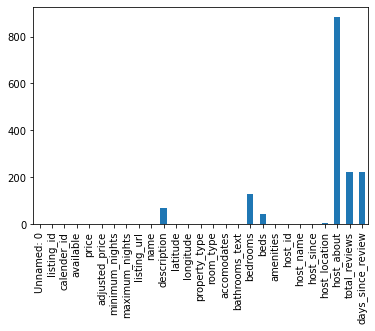

In [14]:
df.isna().sum().plot(kind='bar')

<AxesSubplot:>

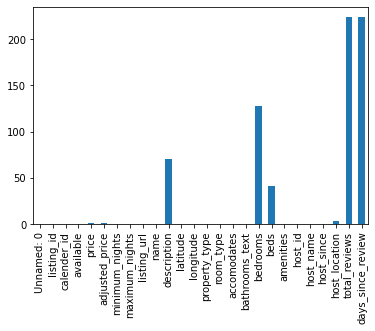

In [15]:
df.drop(['host_about'],axis=1,inplace=True)
df.isna().sum().plot(kind='bar')

In [16]:
df.columns

Index(['Unnamed: 0', 'listing_id', 'calender_id', 'available', 'price',
       'adjusted_price', 'minimum_nights', 'maximum_nights', 'listing_url',
       'name', 'description', 'latitude', 'longitude', 'property_type',
       'room_type', 'accomodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'host_id', 'host_name', 'host_since', 'host_location',
       'total_reviews', 'days_since_review'],
      dtype='object')

In [17]:
df.drop(['Unnamed: 0','calender_id','listing_url'],axis=1,inplace=True)

<AxesSubplot:>

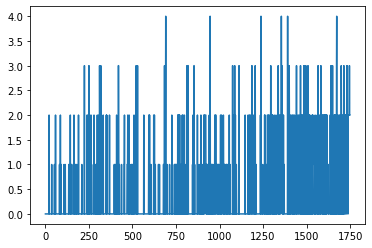

In [18]:
df.isna().sum(axis=1).plot()

In [23]:
df = df[df.isna().sum(axis=1)<4]
df.reset_index(level=0, inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [24]:
df.shape

(1743, 23)

In [25]:
df.head(2)

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,name,description,latitude,longitude,...,bathrooms_text,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review
0,50904,0.0,166.666667,158.666667,1.000000,60.0,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,...,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1377.5
1,891884,0.0,175.000000,175.000000,1.666667,1125.0,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,...,1 private bath,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,638.0


<font size="5">Filling of Blank values with appropriate values

a) Total reviews with Zero values
b) Latest review (Since review) with maximum values of the column

<AxesSubplot:>

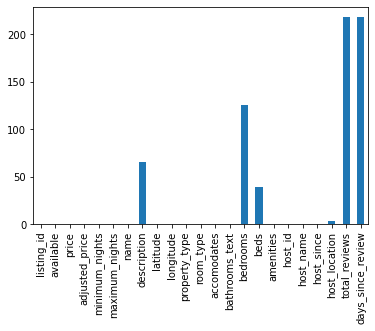

In [27]:
df.isna().sum().plot(kind='bar')

In [28]:
df['total_reviews']=df['total_reviews'].fillna(0)

<AxesSubplot:>

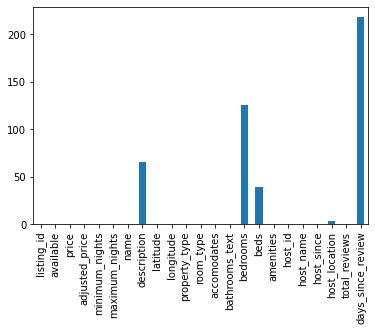

In [29]:
df.isna().sum().plot(kind='bar')

In [48]:
#import datetime
#basedate2=datetime.date.today()
df['days_since_review']=df['days_since_review'].fillna(df['days_since_review'].max())

<AxesSubplot:>

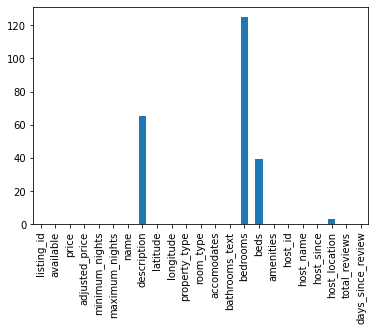

In [49]:
df.isna().sum().plot(kind='bar')

<AxesSubplot:xlabel='property_type'>

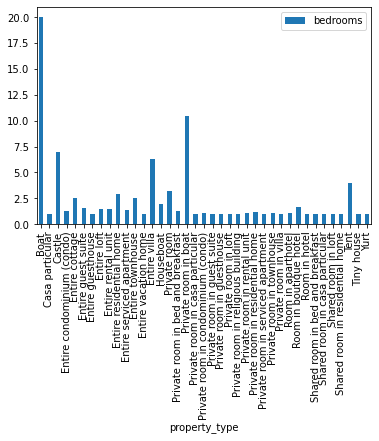

In [61]:
df.groupby('property_type').mean()[['bedrooms']].plot(kind='bar')

<font size="5"> Blank Bed room values filled based on number accomadates

<AxesSubplot:xlabel='accomodates'>

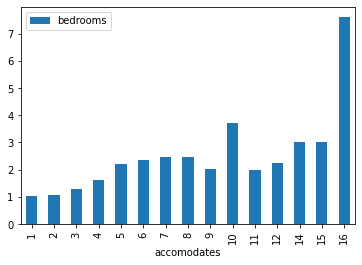

In [60]:
df.groupby('accomodates').mean()[['bedrooms']].plot(kind='bar')

In [87]:
bedroom_dict = df.groupby('accomodates').mean()['bedrooms'].to_dict()
bedroom_dict = {key : round(bedroom_dict[key],0) for key in bedroom_dict}
bedroom_dict

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 2.0,
 5: 2.0,
 6: 2.0,
 7: 2.0,
 8: 2.0,
 9: 2.0,
 10: 4.0,
 11: 2.0,
 12: 2.0,
 14: 3.0,
 15: 3.0,
 16: 8.0}

In [81]:
bedrooms = df.groupby('accomodates').mean()['bedrooms']

In [92]:
data = pd.DataFrame.from_dict(bedroom_dict, orient ='index')

In [93]:
data

,0
1,1.0
2,1.0
3,1.0
4,2.0
5,2.0
6,2.0
7,2.0
8,2.0
9,2.0
10,4.0


In [101]:
data.rename(columns = {0 :'bedrooms_mean'}, inplace = True)
data

,bedrooms_mean
1,1.0
2,1.0
3,1.0
4,2.0
5,2.0
6,2.0
7,2.0
8,2.0
9,2.0
10,4.0


In [102]:
fillvalues = df[df['bedrooms'].isna()]['accomodates'].map(bedroom_dict)

In [103]:
fillvalues

81      2.0
89      1.0
90      1.0
107     1.0
114     1.0
       ... 
1635    1.0
1667    2.0
1696    2.0
1697    1.0
1740    1.0
Name: accomodates, Length: 125, dtype: float64

In [117]:
fill_index = df[pd.isna(df.bedrooms)].index

In [118]:
fill_index

Int64Index([  81,   89,   90,  107,  114,  134,  150,  151,  152,  166,
            ...
            1504, 1525, 1561, 1577, 1619, 1635, 1667, 1696, 1697, 1740],
           dtype='int64', length=125)

In [119]:
for i,j in enumerate(fill_index):
    df.iloc[j,14] = fillvalues.iloc[i]

<AxesSubplot:>

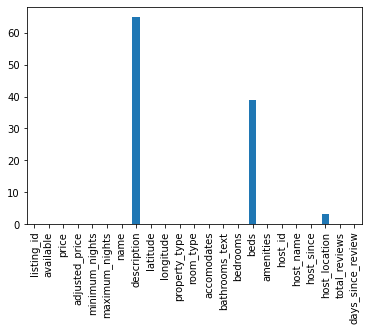

In [120]:
df.isna().sum().plot(kind='bar')

In [122]:
filling_index = df[pd.isna(df.beds)].index
fill_bed = df[df['beds'].isna()]['accomodates'].map(bedroom_dict)

In [123]:
for i,j in enumerate(filling_index):
    df.iloc[j,15] = fillvalues.iloc[i]

<AxesSubplot:>

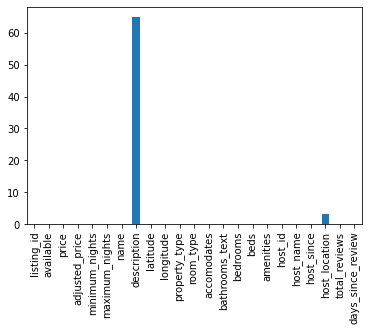

In [124]:
df.isna().sum().plot(kind='bar')

In [125]:
df.drop(['description'],axis=1,inplace=True)

<AxesSubplot:>

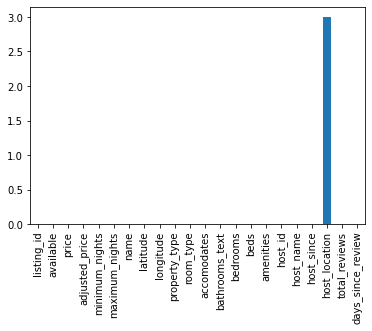

In [126]:
df.isna().sum().plot(kind='bar')

<font size="5">Removed blank "Host Location" rows as we can't take any reference

In [129]:
not_na = df['host_location'].notna()
df = df[not_na]

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,name,latitude,longitude,property_type,...,bathrooms_text,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review
0,50904,0.0,166.666667,158.666667,1.000000,60.0,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,Room in boutique hotel,...,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1377.5
1,891884,0.0,175.000000,175.000000,1.666667,1125.0,aplace/antwerp: amazing suite & square view,51.218575,4.398631,Room in boutique hotel,...,1 private bath,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,638.0


<AxesSubplot:>

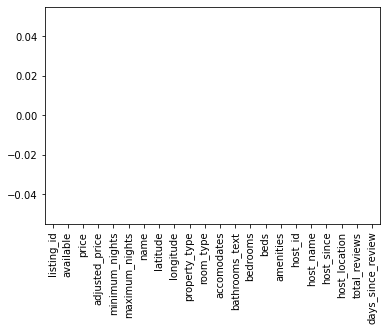

In [131]:
df.isna().sum().plot(kind='bar')

In [138]:
df.columns

Index(['listing_id', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights', 'name', 'latitude', 'longitude', 'property_type',
       'room_type', 'accomodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'host_id', 'host_name', 'host_since', 'host_location',
       'total_reviews', 'days_since_review'],
      dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740 entries, 0 to 1742
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   listing_id         1740 non-null   int64  
 1   available          1740 non-null   float64
 2   price              1740 non-null   float64
 3   adjusted_price     1740 non-null   float64
 4   minimum_nights     1740 non-null   float64
 5   maximum_nights     1740 non-null   float64
 6   name               1740 non-null   object 
 7   latitude           1740 non-null   float64
 8   longitude          1740 non-null   float64
 9   property_type      1740 non-null   object 
 10  room_type          1740 non-null   object 
 11  accomodates        1740 non-null   int64  
 12  bathrooms_text     1740 non-null   object 
 13  bedrooms           1740 non-null   float64
 14  beds               1740 non-null   float64
 15  amenities          1740 non-null   object 
 16  host_id            1740 

<font size="5">Crfeation of new column "No_of_Amenities" which can affect the price

In [142]:
df.groupby('listing_id')[['amenities']].count()

,amenities
listing_id,
50904,1
116134,1
218916,1
224333,1
224682,1
...,...
53916524,1
53928545,1
53929354,1


In [254]:
df['no_of_amenities'] = df['amenities'].map(len)

In [255]:
df['no_of_amenities']

0       591
1       550
2       796
3       765
4       823
       ... 
1738    128
1739    715
1740    158
1741    609
1742    678
Name: no_of_amenities, Length: 1740, dtype: int64

<font size="5">Creation of new columns "No_of_bathrooms" & "Bathrooms_type"

In [281]:
df['bathrooms_text'].unique()

array(['1 private bath', '1.5 baths', '2.5 baths', '1 bath',
       '2 shared baths', '3 shared baths', 'Shared half-bath',
       '1.5 shared baths', '2 baths', '1 shared bath', '3.5 baths',
       '3 baths', '2.5 shared baths', '8.5 baths', '4 baths', '0 baths',
       '5 baths', 'Half-bath', 'Private half-bath', '4 shared baths',
       '0 shared baths', '6.5 baths', '15.5 baths', '8 baths', '6 baths',
       '7.5 baths'], dtype=object)

In [285]:
df['no_of_bath'] = df['bathrooms_text'].str.split(' ').str[0]

In [288]:
df['no_of_bath'].unique()

array(['1', '1.5', '2.5', '2', '3', 'Shared', '3.5', '8.5', '4', '0', '5',
       'Half-bath', 'Private', '6.5', '15.5', '8', '6', '7.5'],
      dtype=object)

In [294]:
df.no_of_bath = df.no_of_bath.replace(['Half-bath','Private','Shared'], [0.5,0.5,0.5])

In [295]:
df['no_of_bath'].unique()

array(['1', '1.5', '2.5', '2', '3', 0.5, '3.5', '8.5', '4', '0', '5',
       '6.5', '15.5', '8', '6', '7.5'], dtype=object)

In [321]:
word_list = ["shared", "Shared",".5"]
df['bath_type'] = df.apply(lambda row: any(word in row["bathrooms_text"] for word in word_list), axis = 1)

In [322]:
df['bath_type']

0       False
1       False
2        True
3        True
4        True
        ...  
1738    False
1739     True
1740    False
1741     True
1742     True
Name: bath_type, Length: 1740, dtype: bool

In [325]:
df.bath_type = df.bath_type.replace([True,False], ['Shared','Private'])

In [326]:
df['bath_type']

0       Private
1       Private
2        Shared
3        Shared
4        Shared
         ...   
1738    Private
1739     Shared
1740    Private
1741     Shared
1742     Shared
Name: bath_type, Length: 1740, dtype: object

In [327]:
#df.to_csv('cleaned_sorted.csv')

In [339]:
df['host_since']

0       2010-09-14
1       2010-09-14
2       2010-09-14
3       2010-09-14
4       2011-05-14
           ...    
1738    2017-12-29
1739    2015-10-11
1740    2016-05-27
1741    2020-11-30
1742    2021-12-24
Name: host_since, Length: 1740, dtype: object

<font size="5">Created a new column as host_since as the old host is trustworthy

In [359]:
import pandas as pd
from datetime import date
df['host_since'] = pd.to_datetime(df['host_since'])

In [361]:
df['host_since']

0      2010-09-14
1      2010-09-14
2      2010-09-14
3      2010-09-14
4      2011-05-14
          ...    
1738   2017-12-29
1739   2015-10-11
1740   2016-05-27
1741   2020-11-30
1742   2021-12-24
Name: host_since, Length: 1740, dtype: datetime64[ns]

In [363]:
basedate=pd.Timestamp('2022-05-01')
host_for=abs(df['host_since']-basedate).dt.days
host_for

0       4247
1       4247
2       4247
3       4247
4       4005
        ... 
1738    1584
1739    2394
1740    2165
1741     517
1742     128
Name: host_since, Length: 1740, dtype: int64

In [364]:
df['host_for']=host_for

In [365]:
df['host_for']

0       4247
1       4247
2       4247
3       4247
4       4005
        ... 
1738    1584
1739    2394
1740    2165
1741     517
1742     128
Name: host_for, Length: 1740, dtype: int64

In [371]:
df["host_country"] = df["host_location"].str.split().str[-1]

In [373]:
df["host_country"].describe()

count        1740
unique         32
top       Belgium
freq         1436
Name: host_country, dtype: object

In [374]:
df.to_csv('cleaned_sorted.csv')